<a href="https://colab.research.google.com/github/jaeeaj125/Coding_Projects/blob/main/Binary_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification practice

In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
max([max(sequence) for sequence in test_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 17s 63ms/step - loss: 0.5930 - acc: 0.7101 - val_loss: 0.3975 - val_acc: 0.8733
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3348 - acc: 0.9013 - val_loss: 0.3178 - val_acc: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2422 - acc: 0.9245 - val_loss: 0.2823 - val_acc: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1842 - acc: 0.9445 - val_loss: 0.2845 - val_acc: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1498 - acc: 0.9535 - val_loss: 0.2878 - val_acc: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1237 - acc: 0.9624 - val_loss: 0.2876 - val_acc: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0988 - acc: 0.9711 - val_loss: 0.3287 - val_acc: 0.8747
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0830 - 

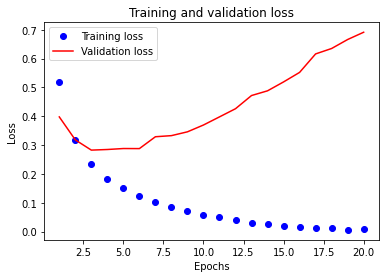

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

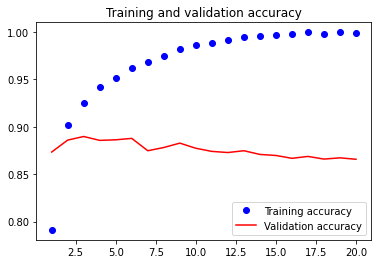

In [14]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Re-train the model

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.5307 - acc: 0.7519
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2634 - acc: 0.9109
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1954 - acc: 0.9340
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3128 - acc: 0.8768


[0.3127538859844208, 0.8767600059509277]

# Training with more layers

In [18]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.6102 - acc: 0.7010 - val_loss: 0.3856 - val_acc: 0.8697
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3151 - acc: 0.9010 - val_loss: 0.3098 - val_acc: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2092 - acc: 0.9344 - val_loss: 0.3213 - val_acc: 0.8727
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1581 - acc: 0.9496 - val_loss: 0.3294 - val_acc: 0.8745
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1224 - acc: 0.9627 - val_loss: 0.3037 - val_acc: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0977 - acc: 0.9704 - val_loss: 0.3294 - val_acc: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0763 - acc: 0.9784 - val_loss: 0.3597 - val_acc: 0.8796
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0589 - a

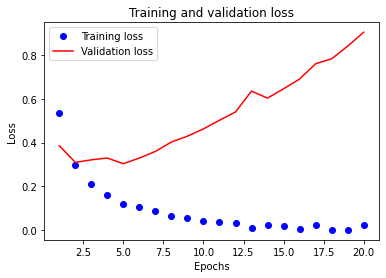

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

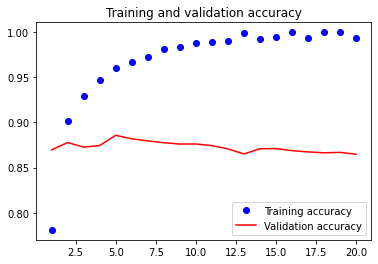

In [20]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
49/49 [==============================] - 3s 31ms/step - loss: 0.5553 - acc: 0.7354
Epoch 2/5
49/49 [==============================] - 2s 31ms/step - loss: 0.2562 - acc: 0.9100
Epoch 3/5
49/49 [==============================] - 2s 31ms/step - loss: 0.1806 - acc: 0.9376
Epoch 4/5
49/49 [==============================] - 1s 30ms/step - loss: 0.1661 - acc: 0.9399
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3558 - acc: 0.8741


[0.3558337092399597, 0.8740800023078918]

# Training with more units

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 82ms/step - loss: 0.5842 - acc: 0.6829 - val_loss: 0.3400 - val_acc: 0.8702
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2815 - acc: 0.8937 - val_loss: 0.3131 - val_acc: 0.8766
Epoch 3/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1794 - acc: 0.9372 - val_loss: 0.3931 - val_acc: 0.8418
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1483 - acc: 0.9426 - val_loss: 0.3524 - val_acc: 0.8755
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0958 - acc: 0.9722 - val_loss: 0.3283 - val_acc: 0.8822
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0714 - acc: 0.9797 - val_loss: 0.3458 - val_acc: 0.8818
Epoch 7/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0487 - acc: 0.9894 - val_loss: 0.3779 - val_acc: 0.8779
Epoch 8/20
30/30 [==============================] - 2s 60ms/step - loss: 0.0293 - a

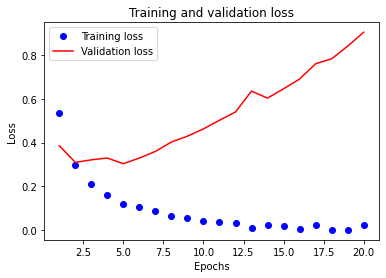

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

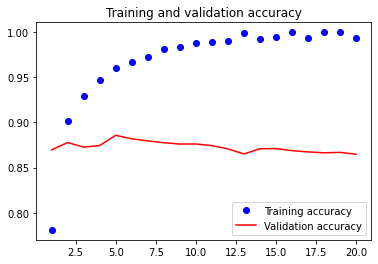

In [24]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
49/49 [==============================] - 4s 51ms/step - loss: 0.5281 - acc: 0.7398
Epoch 2/5
49/49 [==============================] - 2s 51ms/step - loss: 0.2467 - acc: 0.9052
Epoch 3/5
49/49 [==============================] - 2s 51ms/step - loss: 0.1896 - acc: 0.9282
Epoch 4/5
49/49 [==============================] - 2s 49ms/step - loss: 0.1428 - acc: 0.9463
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3408 - acc: 0.8742


[0.3408379554748535, 0.8741599917411804]